In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\91637\Downloads\Churn_Modelling.csv")

In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

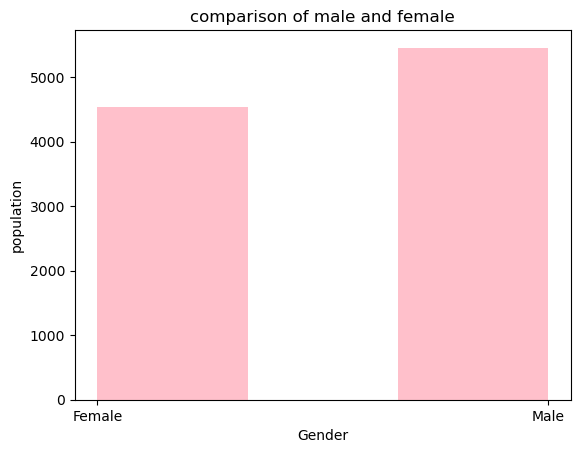

In [7]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = data.Gender, bins = 3, color = 'pink')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

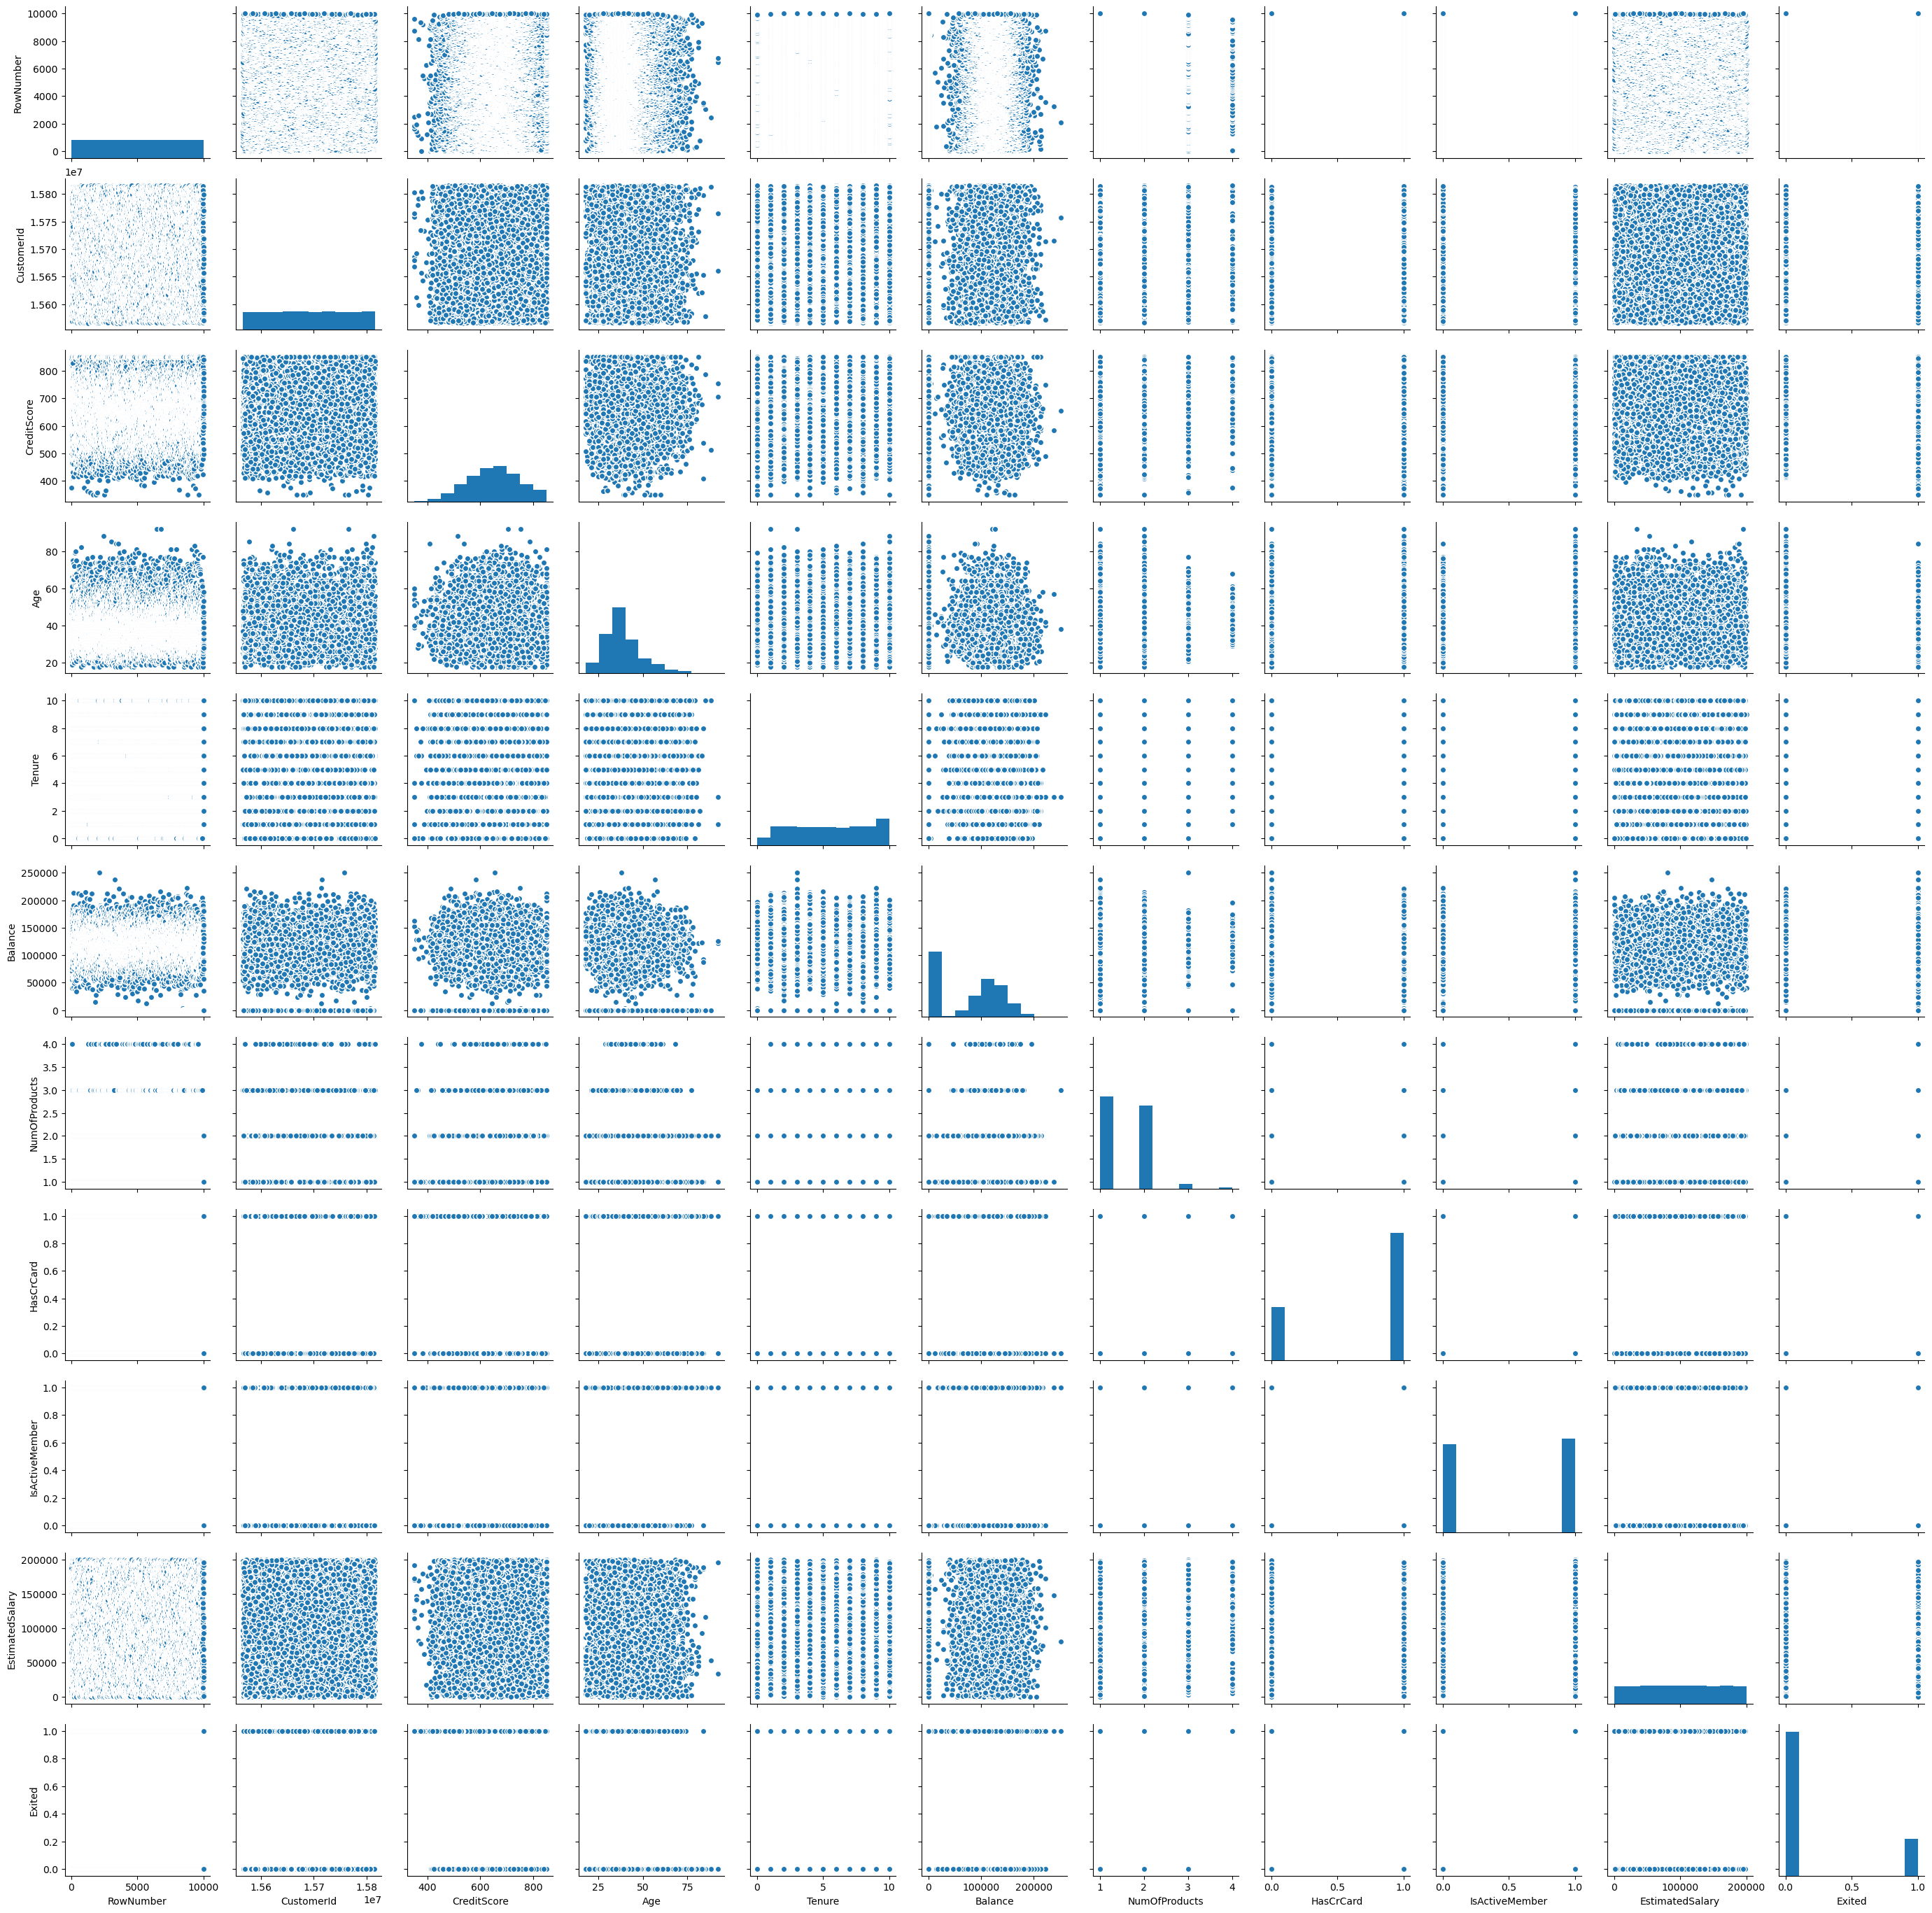

In [8]:
sns.pairplot(data)

In [9]:
data['Age'].value_counts()



Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

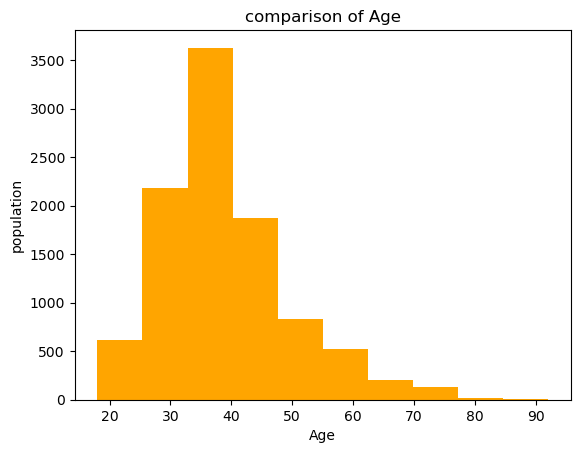

In [10]:
# comparison of age in the dataset

plt.hist(x = data.Age, bins = 10, color = 'orange')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [11]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

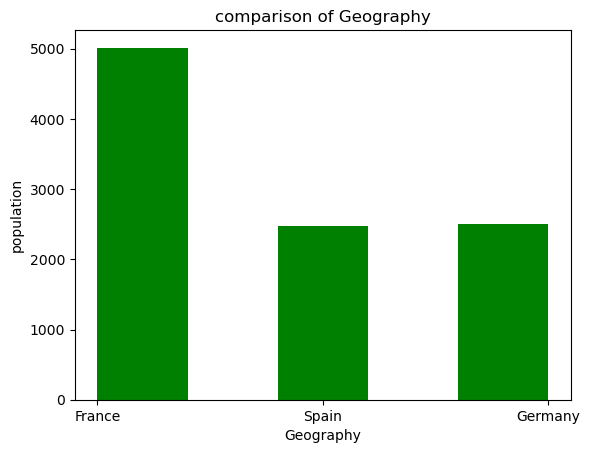

In [12]:
# comparison of geography

plt.hist(x = data.Geography, bins = 5, color = 'green')
plt.title('comparison of Geography')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

In [13]:
data['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

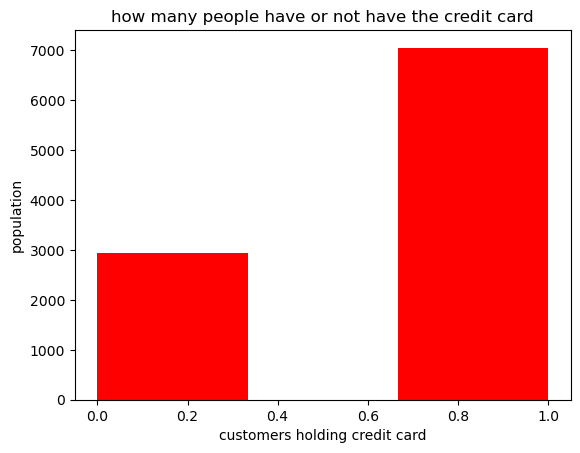

In [14]:
# comparision of how many customers hold the credit card

plt.hist(x = data.HasCrCard, bins = 3, color = 'red')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('population')
plt.show()

In [15]:
data['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

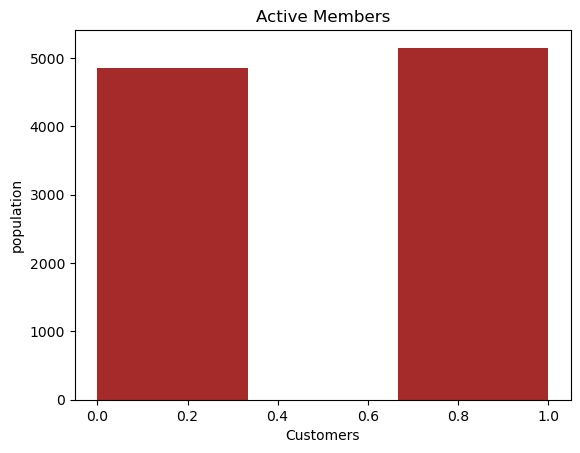

In [16]:
# How many active member does the bank have ?

plt.hist(x = data.IsActiveMember, bins = 3, color = 'brown')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('population')
plt.show()
     

<AxesSubplot:xlabel='Gender'>

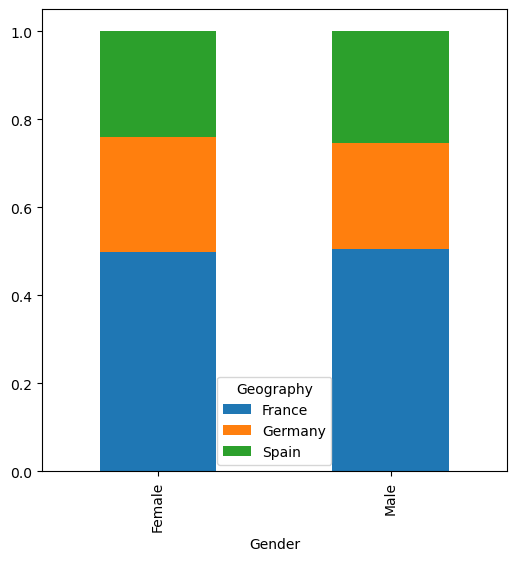

In [17]:
# comparison between Geography and Gender

Gender = pd.crosstab(data['Gender'],data['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))


<AxesSubplot:xlabel='HasCrCard'>

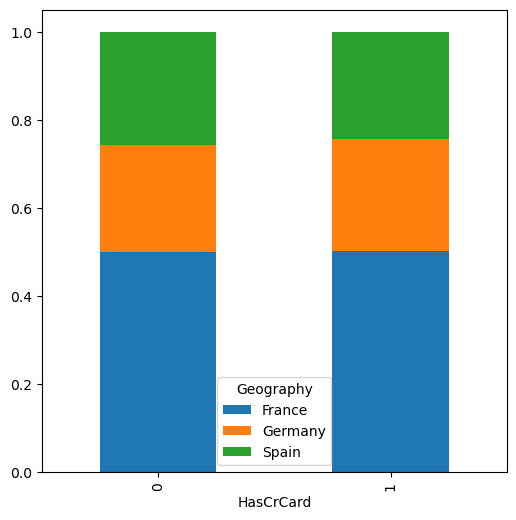

In [18]:
# comparison between geography and card holders

HasCrCard = pd.crosstab(data['HasCrCard'], data['Geography'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                            stacked = True,figsize = (6, 6))


<AxesSubplot:xlabel='IsActiveMember'>

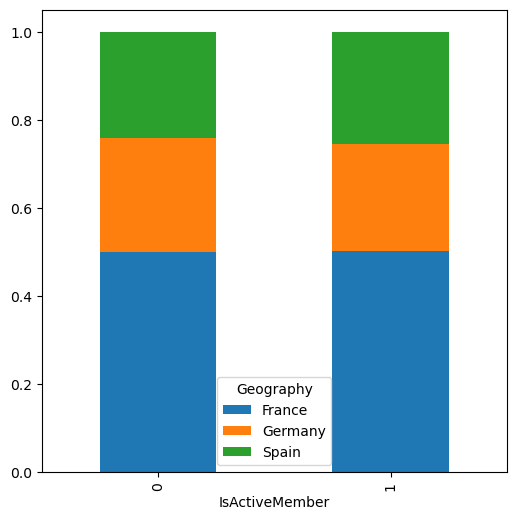

In [19]:
# comparison of active member in differnt geographies

IsActiveMember = pd.crosstab(data['IsActiveMember'], data['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                             stacked = True, figsize= (6, 6))

<AxesSubplot:xlabel='Age'>

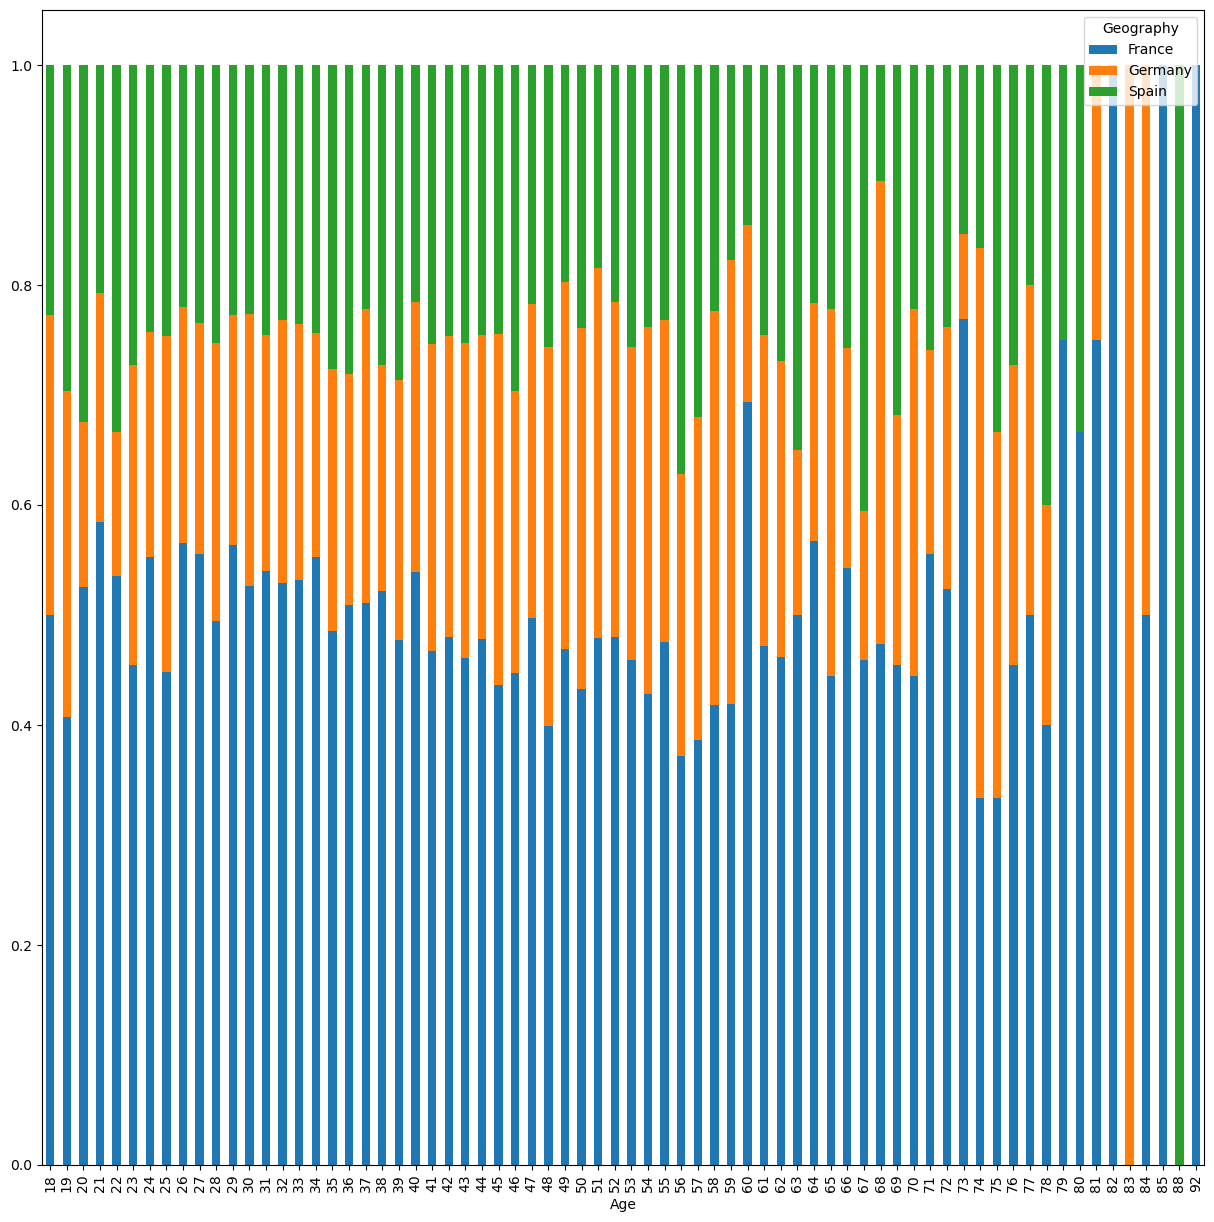

In [20]:
# comparing ages in different geographies

Age = pd.crosstab(data['Age'], data['Geography'])
Age.div(Age.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (15,15))

In [21]:
# calculating total balance in france, germany and spain

total_france = data.Balance[data.Geography == 'France'].sum()
total_germany = data.Balance[data.Geography == 'Germany'].sum()
total_spain = data.Balance[data.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)

Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


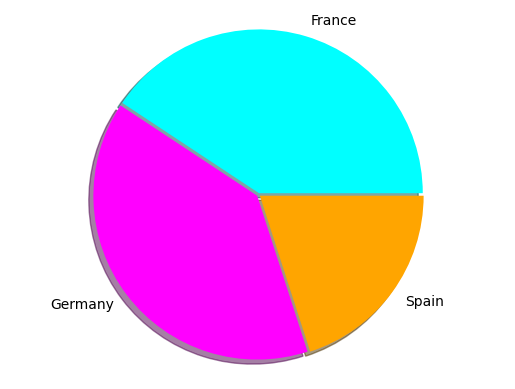

In [22]:
# plotting a pie chart

labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

In [23]:
# Removing the unnecassary features from the dataset

data = data.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)



print(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [24]:
data.shape

(10000, 11)

In [25]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x = data.iloc[:,0:10]
y = data.iloc[:,10]

print(x.shape)
print(y.shape)

print(x.columns)
#print(y)

(10000, 10)
(10000,)
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [26]:
# Encoding Categorical variables into numerical variables
# One Hot Encoding

x = pd.get_dummies(x)

x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [27]:
x.shape

(10000, 13)

In [28]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7500, 13)
(7500,)
(2500, 13)
(2500,)


In [29]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()
     

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.735507,0.015266,0.008860,0.673160,2.535034,-1.553624,-1.034460,-1.640810,-1.015588,1.760216,-0.574682,1.087261,-1.087261
1,1.024427,-0.652609,0.008860,-1.207724,0.804242,0.643657,-1.034460,-0.079272,0.984651,-0.568112,-0.574682,1.087261,-1.087261
2,0.808295,-0.461788,1.393293,-0.356937,0.804242,0.643657,0.966688,-0.996840,-1.015588,-0.568112,1.740094,1.087261,-1.087261
3,0.396614,-0.080145,0.008860,-0.009356,-0.926551,0.643657,0.966688,-1.591746,-1.015588,-0.568112,1.740094,-0.919743,0.919743
4,-0.467915,1.255605,0.701077,-1.207724,0.804242,0.643657,0.966688,1.283302,0.984651,-0.568112,-0.574682,-0.919743,0.919743


# Modelling


### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier() 
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuaracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuaracy : 0.7996
[[1714  277]
 [ 224  285]]


### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)
     

Training Accuracy : 1.0
Testing Accuracy : 0.8684
[[1917   74]
 [ 255  254]]


In [32]:
# k fold cross validatio

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print(cvs)

[0.86       0.85333333 0.86533333 0.86533333 0.856      0.848
 0.86133333 0.85733333 0.86133333 0.86266667]


In [33]:
print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())

Mean Accuracy : 0.8590666666666668
Variance : 0.005199999999999988


### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8096
Testing Accuracy : 0.8092
[[1916   75]
 [ 402  107]]


### Support Vector Machine

In [35]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8625333333333334
Testing Accuracy : 0.8616
[[1951   40]
 [ 306  203]]


In [36]:
# k fold cross validatio

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print(cvs)
     

[0.864      0.852      0.864      0.85733333 0.84266667 0.844
 0.852      0.85333333 0.84533333 0.85066667]


In [37]:
print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())
     

Mean Accuracy : 0.8525333333333333
Variance : 0.007160384843785353


### Multi Layer Perceptron

In [38]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (100, 100), activation ='relu', 
                      solver = 'adam', max_iter = 50)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.886
Testing Accuracy : 0.8584
[[1919   72]
 [ 282  227]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


### Aritificial Neural Networks

In [43]:
# import tensorflow
import tensorflow as tf
#import keras 
from tensorflow import keras

In [53]:
# define sequential model
model = keras.Sequential([
    # input layer
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [54]:

# time for compilation of neural net.
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
235/235 [==============================] - 4s 5ms/step - loss: 0.4694 - accuracy: 0.7963
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4423 - accuracy: 0.7976
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4261 - accuracy: 0.8055
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4071 - accuracy: 0.8253
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3840 - accuracy: 0.8419
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3661 - accuracy: 0.8505
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3573 - accuracy: 0.8524
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3523 - accuracy: 0.8539
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3484 - accuracy: 0.8561
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3452 - accura

In [55]:
# evalute the model
model.evaluate(x_test,y_test)

79/79 [==============================] - 1s 4ms/step - loss: 0.3672 - accuracy: 0.8524


[0.36724385619163513, 0.852400004863739]

In [60]:
# predict the churn values
ypred = model.predict(x_test)
print(ypred)
# unscaling the ypred values 
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

79/79 [==============================] - 1s 3ms/step
[[0.2533205 ]
 [0.23710766]
 [0.08571535]
 ...
 [0.25581905]
 [0.10014661]
 [0.04594698]]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1991
           1       0.68      0.52      0.59       509

    accuracy                           0.85      2500
   macro avg       0.78      0.73      0.75      2500
weighted avg       0.84      0.85      0.84      2500



Text(183.22222222222223, 0.5, 'True_number')

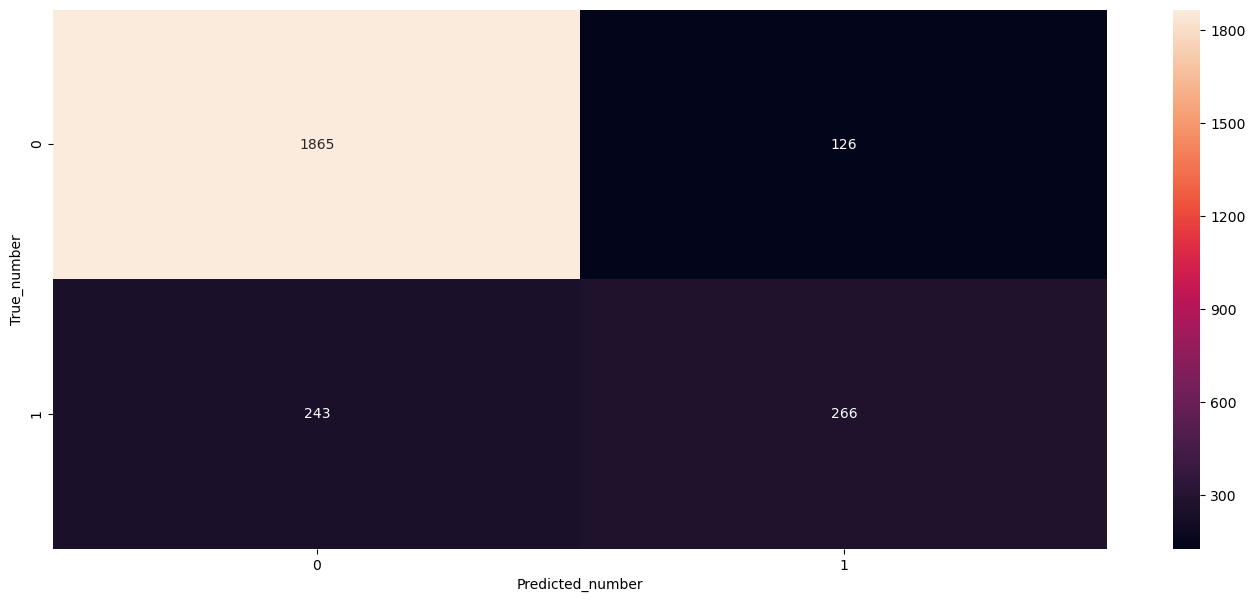

In [62]:
# checking for performance metrices
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
print(classification_report(y_test,ypred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=ypred_lis)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')